# Linear Regression

Suppose that we have the following linear hypothesis funtion:
$$
h_\theta(x)=\theta_{0}+\theta_{1}x_{1}+...+\theta_{n}x_{n}$$

Suppose $x_0=1$, we can rewrite the function as:

$$h_\theta(x)=\sum_{i=0}^{n}\theta_ix_i=\theta^Tx$$

with $x=\begin{bmatrix}x_0\\x_1\\...\\x_n\end{bmatrix}$ and $\theta=\begin{bmatrix}\theta_0\\ \theta_1 \\...\\\theta_n\end{bmatrix}$

## Loss function
Suppose that we have m sample $x_j$ with $j={1,2...m}$.

We define the following loss function as a function of $\theta$:

$$L(\theta)=\sum_{j=1}^m(h_\theta(x_j)-y_j)^2$$
We will find $\theta^*$ such that $L(\theta^*)$ is smallest:
$$\theta^*=arg{min}_\theta L(\theta)$$

In [1]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load data
data = np.loadtxt("/content/drive/MyDrive/Practical Deep Learning/Day_4 : Linear Regression/Linear_Regression.txt")

### Split data into training data and testing data

In [ ]:
np.random.seed(0)

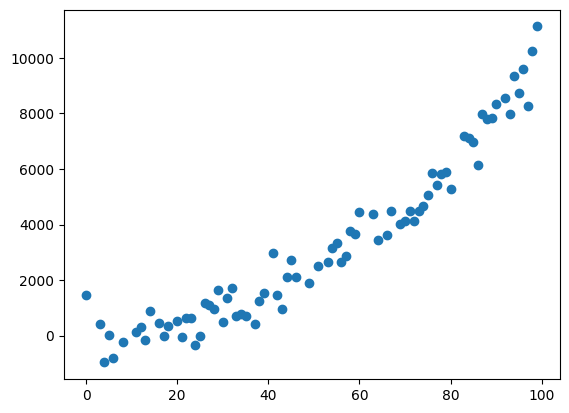

In [5]:
shuffle = np.random.permutation(data.shape[0])

portion = int(0.2 * len(data))

#split into train and validation data
test_x = data[shuffle[:portion], 0].reshape(-1, 1)
test_y = data[shuffle[:portion], 1].reshape(-1, 1)

train_x = data[shuffle[portion:], 0].reshape(-1, 1)
train_y = data[shuffle[portion:], 1].reshape(-1, 1)

# Plot training data
plt.scatter(train_x, train_y)
plt.show()

In [6]:
train_y = train_y/10000
test_y = test_y/10000
train_x = train_x/100
test_x = test_x/100

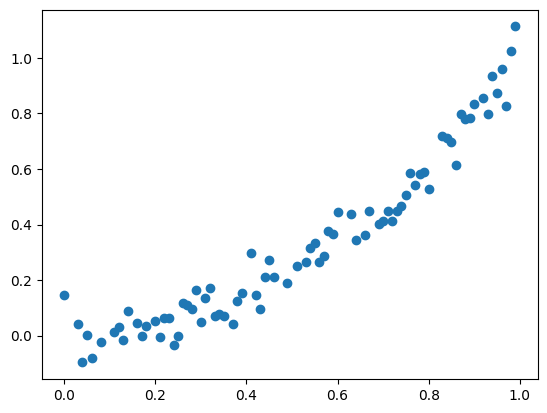

In [7]:
# Plot training data
plt.scatter(train_x, train_y)
plt.show()

In [18]:
#pad x with 1 at the beginning
def pad(x):
    x2 = x**2
    x3 = x**3
    x_pad = np.hstack((np.ones((x.shape[0], 1), dtype = x.dtype), x))
    return np.concatenate((x_pad, x2, x3), axis=1)

def predict(theta, x):
    # YOUR CODE HERE
    return np.dot(pad(x), theta)

def compute_gradient(theta, x, y):
    # Return gradient and loss
    # YOUR CODE HERE
    n = x.shape[0] # tương đương len(y)
    predictions = predict(theta, x)
    errors = predictions - y
    loss = (1 / (2 * n)) * np.sum(errors ** 2)
    grad = (1 / n) * np.dot(pad(x).T, errors)
    return grad, loss

In [19]:
x = pad(train_x)
x[1]

array([1.      , 0.43    , 0.1849  , 0.079507])

### Training

In [37]:
np.random.seed(0)
theta = np.random.randn(4).reshape(4,1)
print(theta)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


Converged.
[[0.01774726]
 [0.15930195]
 [0.05094936]
 [0.83394228]]


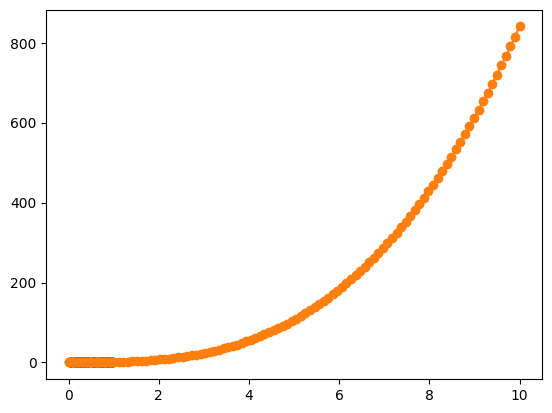

In [47]:
alpha = 0.005
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
while True:
    # Compute gradient, error and update theta
    # YOUR CODE HERE
    gradient, error = compute_gradient(theta, train_x, train_y)
    new_theta = theta - alpha * gradient
    pass
    # ----------------------------------------

    # Stopping Condition
    if np.sum(abs(new_theta - theta)) < tolerance or iterations > 10000:
        print("Converged.")
        break

    # Print error every 100 iterations
    if iterations % 100 == 0:
        print("Iteration: %d - Error: %.4f" %(iterations, error))

    iterations += 1
    theta = new_theta

print(new_theta)
# line_x = np.array([0, 100]).reshape([2,1])
line_x = np.linspace(0, 10, 100).reshape(-1, 1)
line_y = predict(theta, line_x)


plt.plot(train_x, train_y, 'o')
plt.plot(line_x, line_y, marker = 'o')

plt.show()

### Validation

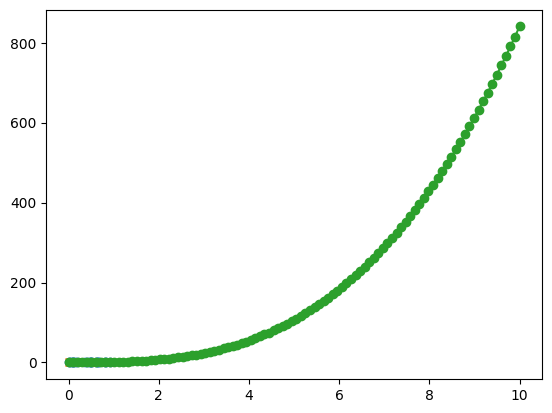

In [48]:
# Predict
# YOUR CODE HERE
test_y_hat = predict(theta, test_x)
# -----------------------------------------

plt.plot(test_x, test_y, 'o')
plt.plot(test_x, test_y_hat, 'x')
plt.plot(line_x, line_y, marker = 'o')
plt.show()